#Importing Libraries

In [ ]:
# pip install -U memory_profiler

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, losses, metrics, callbacks, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%reload_ext memory_profiler
from memory_profiler import profile
import warnings
warnings.filterwarnings('ignore')
seed=42
tf.random.set_seed(seed)

#Data Importing & Pre-processing

Importing the dataset from keras

---



In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

Each image is a 28x28 array

In [ ]:
print("X-train shape :",X_train.shape)
print("y-train shape :", y_train.shape)
print("X-test shape :", X_test.shape)
print("y-test shape :", y_test.shape)

X-train shape : (60000, 28, 28)
y-train shape : (60000,)
X-test shape : (10000, 28, 28)
y-test shape : (10000,)


In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle Boot']

**Labels** :

---
**T-shirt/top** - 0 \
**Trouser** - 1 \
**Pullover** - 2 \
**Dress** - 3 \
**Coat** - 4 \
**Sandal** - 5 \
**Shirt** - 6 \
**Sneaker** - 7 \
**Bag** - 8 \
**Ankle Boot** - 9 \

Normalising the values

---



In [ ]:
X_train,X_test = X_train/255.0 ,X_test/255.0

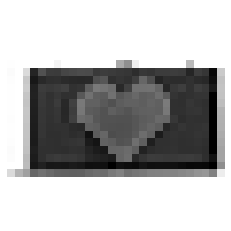


      It is a Bag


In [ ]:
index= np.random.randint(55000)
plt.imshow(X_train[index],cmap='binary')
plt.axis('off')
plt.show()

print('\n      It is a',class_names[y_train[index]])

Converting each 28x28 data point (image array) to 784-D array data point

---



In [ ]:
X_train_flatten= X_train.reshape(X_train.shape[0],-1)
X_test_flatten= X_test.reshape(X_test.shape[0],-1)

In [ ]:
print("X-train shape after flattening:",X_train_flatten.shape)
print("X-test shape after flattening:", X_test_flatten.shape)

X-train shape after flattening: (60000, 784)
X-test shape after flattening: (10000, 784)


#Defining Neural Network model

In [ ]:
def neural_model(x_data,y_data):
  model = keras.models.Sequential([
                                   keras.layers.Dense(400, activation="relu"),
                                   keras.layers.Dense(300, activation="relu"),
                                   keras.layers.Dense(100, activation="relu"),
                                   keras.layers.Dense(10, activation="sigmoid")
                                   ])
  
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
  
  history = model.fit(x_data, y_data,
                      epochs=30, 
                      validation_split = 0.1,
                      verbose=0)
  
  return model

#Standard Logistic Regression & Neural Network Models on the entire training dataset

In [ ]:
%%time
%%memit
log_reg1 = LogisticRegression(multi_class="ovr",solver="saga",random_state=seed)
log_reg1.fit(X_train_flatten, y_train)
print("Accuracy of standard Logistic Regression model: ",log_reg1.score(X_test_flatten, y_test))

Accuracy of standard Logistic Regression model:  0.8426
peak memory: 1505.54 MiB, increment: 20.29 MiB
CPU times: user 10min 43s, sys: 503 ms, total: 10min 43s
Wall time: 10min 44s


In [ ]:
%%time
%%memit
neural1 = neural_model(X_train_flatten, y_train)
print("Accuracy of standard Neural network model:",neural1.evaluate(X_test_flatten, y_test,verbose=0)[1])

Accuracy of standard Neural network model: 0.890500009059906
peak memory: 1539.76 MiB, increment: 34.21 MiB
CPU times: user 4min 17s, sys: 17.3 s, total: 4min 35s
Wall time: 3min 11s


#Models on randomly labelled k instances of the training set

In [ ]:
%%time
%%memit
n_label=np.arange(10,101,5)
print('Logistic Regression:\n')
for i in range(len(n_label)):
    log_reg2 = LogisticRegression(multi_class="ovr",solver="saga",random_state=seed)
    log_reg2.fit(X_train_flatten[:n_label[i]], y_train[:n_label[i]])
    print('Labelled Instance= {}, Accuracy= {}'.format(n_label[i],
            log_reg2.score(X_test_flatten,y_test)))

Logistic Regression:

Labelled Instance= 10, Accuracy= 0.3736
Labelled Instance= 15, Accuracy= 0.4056
Labelled Instance= 20, Accuracy= 0.4278
Labelled Instance= 25, Accuracy= 0.5502
Labelled Instance= 30, Accuracy= 0.5716
Labelled Instance= 35, Accuracy= 0.5916
Labelled Instance= 40, Accuracy= 0.6692
Labelled Instance= 45, Accuracy= 0.6471
Labelled Instance= 50, Accuracy= 0.6618
Labelled Instance= 55, Accuracy= 0.6671
Labelled Instance= 60, Accuracy= 0.6712
Labelled Instance= 65, Accuracy= 0.6736
Labelled Instance= 70, Accuracy= 0.691
Labelled Instance= 75, Accuracy= 0.6888
Labelled Instance= 80, Accuracy= 0.6863
Labelled Instance= 85, Accuracy= 0.6916
Labelled Instance= 90, Accuracy= 0.6825
Labelled Instance= 95, Accuracy= 0.675
Labelled Instance= 100, Accuracy= 0.6914
peak memory: 1076.21 MiB, increment: 20.23 MiB
CPU times: user 13.1 s, sys: 1.98 s, total: 15.1 s
Wall time: 12.7 s


In [ ]:
%%time
%%memit
n_label=np.arange(10,101,5)
print('Neural Network:\n')
for i in range(len(n_label)):
    neural2 = neural_model(X_train_flatten[:n_label[i]], y_train[:n_label[i]])
    print('Labelled Instance= {}, Accuracy= {}'.format(n_label[i],
            neural2.evaluate(X_test_flatten,y_test,verbose=0)[1]))

Neural Network:

Labelled Instance= 10, Accuracy= 0.35679998993873596
Labelled Instance= 15, Accuracy= 0.3878999948501587
Labelled Instance= 20, Accuracy= 0.41040000319480896
Labelled Instance= 25, Accuracy= 0.48100000619888306
Labelled Instance= 30, Accuracy= 0.4902999997138977
Labelled Instance= 35, Accuracy= 0.5960999727249146
Labelled Instance= 40, Accuracy= 0.5856000185012817
Labelled Instance= 45, Accuracy= 0.6236000061035156
Labelled Instance= 50, Accuracy= 0.6244000196456909
Labelled Instance= 55, Accuracy= 0.6661999821662903
Labelled Instance= 60, Accuracy= 0.6784999966621399
Labelled Instance= 65, Accuracy= 0.6656000018119812
Labelled Instance= 70, Accuracy= 0.6959999799728394
Labelled Instance= 75, Accuracy= 0.6850000023841858
Labelled Instance= 80, Accuracy= 0.720300018787384
Labelled Instance= 85, Accuracy= 0.707099974155426
Labelled Instance= 90, Accuracy= 0.7009000182151794
Labelled Instance= 95, Accuracy= 0.7190999984741211
Labelled Instance= 100, Accuracy= 0.7178999781

#Models on the centroids computed using K-Means Clustering

Computing k Centroids using K-Means Clustering

---



In [ ]:
k=100

In [ ]:
%%time
%%memit
kmeans = KMeans(init='k-means++',n_clusters=k, random_state=seed)
X_image_dist = kmeans.fit_transform(X_train_flatten)
representative_image_idx = np.argmin(X_image_dist, axis=0)
X_representative_image = X_train_flatten[representative_image_idx]

peak memory: 2107.80 MiB, increment: 733.59 MiB
CPU times: user 9min 44s, sys: 1min 36s, total: 11min 20s
Wall time: 6min 2s


In [ ]:
y_representative_image = y_train[representative_image_idx]
print(np.array(class_names)[y_representative_image])

['Pullover' 'Pullover' 'Dress' 'Bag' 'Pullover' 'Ankle Boot' 'Shirt'
 'Ankle Boot' 'Sneaker' 'T-shirt/top' 'Pullover' 'Shirt' 'Shirt' 'Bag'
 'Coat' 'Sandal' 'Sneaker' 'T-shirt/top' 'Bag' 'Ankle Boot' 'Coat'
 'Sneaker' 'Trouser' 'Sandal' 'Bag' 'Bag' 'Sneaker' 'Shirt' 'Shirt' 'Bag'
 'Pullover' 'Dress' 'T-shirt/top' 'Trouser' 'Shirt' 'Dress' 'Ankle Boot'
 'Trouser' 'Ankle Boot' 'Bag' 'Coat' 'Ankle Boot' 'T-shirt/top' 'Bag'
 'Sneaker' 'Dress' 'Bag' 'Dress' 'Ankle Boot' 'Sneaker' 'Ankle Boot' 'Bag'
 'Shirt' 'Shirt' 'Shirt' 'Bag' 'T-shirt/top' 'Sneaker' 'T-shirt/top'
 'Coat' 'Pullover' 'Ankle Boot' 'Bag' 'Pullover' 'Trouser' 'Trouser'
 'Sneaker' 'Pullover' 'Coat' 'Pullover' 'Sandal' 'Sandal' 'Sandal'
 'T-shirt/top' 'Coat' 'Sneaker' 'Trouser' 'Bag' 'Dress' 'Sandal' 'Dress'
 'Dress' 'T-shirt/top' 'Sandal' 'Shirt' 'Shirt' 'Dress' 'Ankle Boot'
 'Shirt' 'Trouser' 'Ankle Boot' 'Pullover' 'Dress' 'Shirt' 'Shirt' 'Dress'
 'Trouser' 'Trouser' 'Sneaker' 'Trouser']


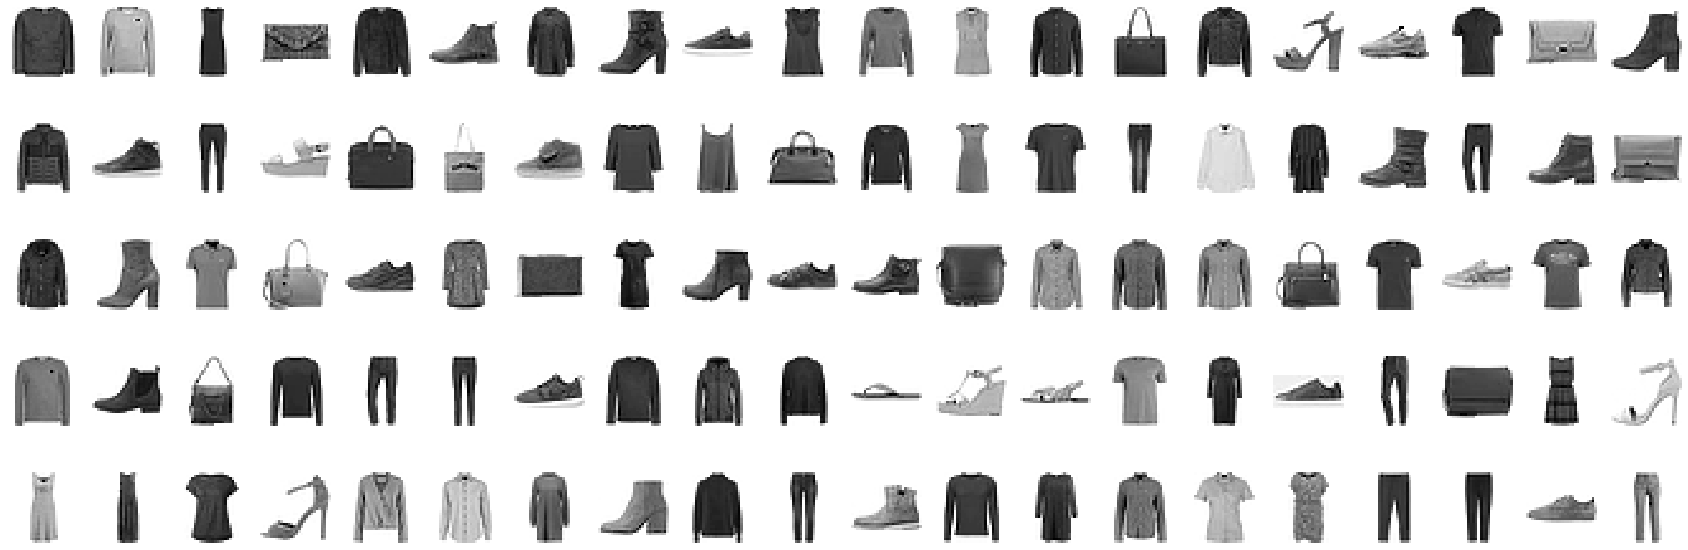

In [ ]:
plt.figure(figsize=(30, 10))
for index, X_representative_images in enumerate(X_representative_image):
 plt.subplot(5, k//5, index + 1)
 plt.imshow(X_representative_image[index].reshape(28,28), cmap="binary", interpolation="nearest")
 plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
%%time
%%memit
log_reg3 = LogisticRegression(multi_class="ovr",solver="saga",random_state=seed)
log_reg3.fit(X_representative_image, y_representative_image)
print("Accuracy of Logistic Regression: ",log_reg3.score(X_test_flatten, y_test))

Accuracy of Logistic Regression:  0.6986
peak memory: 2114.06 MiB, increment: 0.11 MiB
CPU times: user 1.43 s, sys: 89.7 ms, total: 1.52 s
Wall time: 1.58 s


In [ ]:
%%time
%%memit
neural3 = neural_model(X_representative_image, y_representative_image)
print("Accuracy of neural network model: ",neural3.evaluate(X_test_flatten, y_test,verbose=0)[1])

Accuracy of neural network model:  0.7096999883651733
peak memory: 2113.97 MiB, increment: 0.65 MiB
CPU times: user 3.94 s, sys: 349 ms, total: 4.29 s
Wall time: 3.95 s


#Propgating labels of the centroid to each data point in the cluster

In [ ]:
y_train_propagated = np.empty(len(X_train_flatten), dtype=np.int32)
for i in range(k):
 y_train_propagated[kmeans.labels_==i] = y_representative_image[i]

In [ ]:
%%time
%%memit
log_reg4 = LogisticRegression(multi_class="ovr",solver="saga",random_state=seed)
log_reg4.fit(X_train_flatten, y_train_propagated)
print("Accuracy of Logistic Regression: ",log_reg4.score(X_test_flatten, y_test))

Accuracy of Logistic Regression:  0.6948
peak memory: 2113.95 MiB, increment: 0.02 MiB
CPU times: user 10min 55s, sys: 586 ms, total: 10min 56s
Wall time: 10min 53s


In [ ]:
%%time
%%memit
neural4 = neural_model(X_train_flatten, y_train_propagated)
print("Accuracy of neural network model: ",neural4.evaluate(X_test_flatten, y_test,verbose=0)[1])

Accuracy of neural network model:  0.6879000067710876
peak memory: 2114.12 MiB, increment: 0.17 MiB
CPU times: user 10min 1s, sys: 32 s, total: 10min 33s
Wall time: 6min 44s


#Propgating labels to data points closer to cluster centroids (using some percentile)

In [ ]:
def k_means_per_lr(p):
  X_cluster_dist = X_image_dist[np.arange(len(X_train_flatten)), kmeans.labels_]
  for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, p)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
  partially_propagated = (X_cluster_dist != -1)
   # Allocating Labels to Labelled Point in Cluster
  X_train_partially_propagated = X_train_flatten[partially_propagated]
  y_train_partially_propagated = y_train_propagated[partially_propagated]
  log_reg5 = LogisticRegression(multi_class="ovr",solver="saga",random_state=seed)
  log_reg5.fit(X_train_partially_propagated, y_train_partially_propagated)
  print('Percentile ={}, Accuracy= {}'.format(j,log_reg5.score(X_test_flatten, y_test)))

In [ ]:
%%time
%%memit
print('Logistic Regression \n')
per=[20,25,50,75]
for j in per:
  k_means_per_lr(j)

Logistic Regression 

Percentile =20, Accuracy= 0.7085
Percentile =25, Accuracy= 0.7084
Percentile =50, Accuracy= 0.6982
Percentile =75, Accuracy= 0.6942
peak memory: 2114.08 MiB, increment: 0.02 MiB
CPU times: user 18min 3s, sys: 1.02 s, total: 18min 4s
Wall time: 17min 59s


In [ ]:
def k_means_per_nn(p):
  X_cluster_dist = X_image_dist[np.arange(len(X_train_flatten)), kmeans.labels_]
  for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, p)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
  partially_propagated = (X_cluster_dist != -1)
   # Allocating Labels to Labelled Point in Cluster
  X_train_partially_propagated = X_train_flatten[partially_propagated]
  y_train_partially_propagated = y_train_propagated[partially_propagated]
  neural5 = neural_model(X_train_partially_propagated, y_train_partially_propagated)
  print('Percentile ={}, Accuracy= {}'.format(j,neural5.evaluate(X_test_flatten, y_test,verbose=0)[1]))

In [ ]:
%%time
%%memit
print('Neural Network \n')
per=[20,25,50,75]
for j in per:
  k_means_per_nn(j)

Neural Network 

Percentile =20, Accuracy= 0.6923999786376953
Percentile =25, Accuracy= 0.6905999779701233
Percentile =50, Accuracy= 0.6845999956130981
Percentile =75, Accuracy= 0.6879000067710876
peak memory: 2114.23 MiB, increment: 0.15 MiB
CPU times: user 17min 8s, sys: 58.2 s, total: 18min 6s
Wall time: 12min 17s
